# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, SELU DO50

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'do':0.5}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.444s 


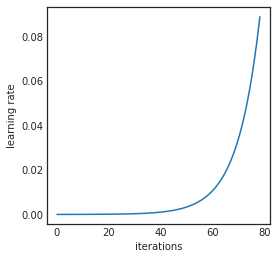

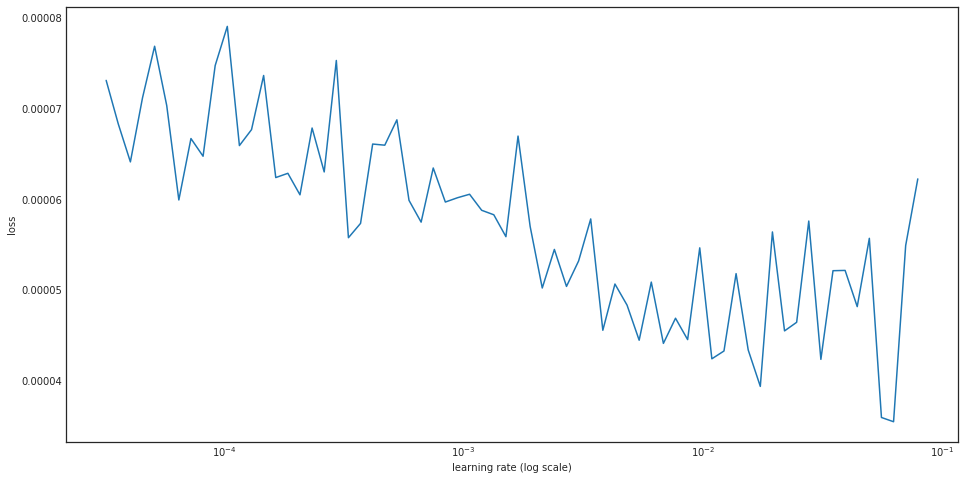

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 5e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.79241373573e-05
2 New best found: 3.5572786308e-05
3 New best found: 3.45721514698e-05
5 New best found: 3.40174364443e-05
6 New best found: 3.35234414428e-05
7 New best found: 3.32969799125e-05
10 New best found: 3.31710978411e-05
11 New best found: 3.30814354959e-05
12 New best found: 3.27524837239e-05
13 New best found: 3.26126524044e-05
14 New best found: 3.24795937952e-05
15 New best found: 3.24345221385e-05
26 New best found: 3.23774527226e-05
27 New best found: 3.23454725281e-05
28 New best found: 3.22278663395e-05
29 New best found: 3.2201226478e-05
30 New best found: 3.21941747465e-05
31 New best found: 3.21849092522e-05
51 New best found: 3.20636418478e-05
54 New best found: 3.19435581914e-05
57 New best found: 3.19408119584e-05
58 New best found: 3.19109688975e-05
59 New best found: 3.19082716343e-05
60 New best found: 3.18820472206e-05
61 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114029). Check your callbacks.
  % delta_t_median)


1 New best found: 3.90641583596e-05
2 New best found: 3.57847068945e-05
3 New best found: 3.51306507697e-05
5 New best found: 3.48055639132e-05
6 New best found: 3.42522532921e-05
7 New best found: 3.40505553378e-05
10 New best found: 3.38824200838e-05
11 New best found: 3.3629804936e-05
13 New best found: 3.33982704393e-05
14 New best found: 3.33417882614e-05
15 New best found: 3.32921657282e-05
26 New best found: 3.30734491876e-05
27 New best found: 3.30034672276e-05
28 New best found: 3.29158432595e-05
29 New best found: 3.28747800122e-05
30 New best found: 3.28545386832e-05
31 New best found: 3.28524639057e-05
49 New best found: 3.28219302545e-05
51 New best found: 3.27817249942e-05
52 New best found: 3.27585597002e-05
53 New best found: 3.26881208704e-05
55 New best found: 3.26134906089e-05
58 New best found: 3.25688065234e-05
59 New best found: 3.25675709232e-05
61 New best found: 3.25480112686e-05
62 New best found: 3.25446232082e-05
107 New best found: 3.25333689902e-05
109 New

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115142). Check your callbacks.
  % delta_t_median)


1 New best found: 3.93995282502e-05
2 New best found: 3.707575684e-05
3 New best found: 3.59738264039e-05
5 New best found: 3.53787363217e-05
6 New best found: 3.44738086698e-05
7 New best found: 3.44709153271e-05
12 New best found: 3.39310285403e-05
13 New best found: 3.3895628148e-05
14 New best found: 3.38488087135e-05
15 New best found: 3.38280184707e-05
24 New best found: 3.37650543425e-05
26 New best found: 3.35540827038e-05
27 New best found: 3.3426772707e-05
28 New best found: 3.33252553043e-05
30 New best found: 3.32636383152e-05
31 New best found: 3.32632435613e-05
50 New best found: 3.32300472322e-05
52 New best found: 3.3116512693e-05
55 New best found: 3.30156913153e-05
57 New best found: 3.29127276953e-05
59 New best found: 3.2909278333e-05
102 New best found: 3.28845947908e-05
105 New best found: 3.28240634379e-05
113 New best found: 3.27996761702e-05
115 New best found: 3.27933494183e-05
117 New best found: 3.27686399515e-05
118 New best found: 3.27627643905e-05
122 New

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154344). Check your callbacks.
  % delta_t_median)


1 New best found: 3.76895488983e-05
2 New best found: 3.5168797785e-05
3 New best found: 3.44746353724e-05
4 New best found: 3.44275083983e-05
5 New best found: 3.36529809123e-05
6 New best found: 3.30170959901e-05
7 New best found: 3.29793122573e-05
11 New best found: 3.26914217731e-05
12 New best found: 3.25994943123e-05
13 New best found: 3.23688470801e-05
15 New best found: 3.2311746048e-05
26 New best found: 3.21290629343e-05
27 New best found: 3.20841429918e-05
28 New best found: 3.20407129636e-05
29 New best found: 3.20066394982e-05
30 New best found: 3.19543259981e-05
52 New best found: 3.19014013515e-05
55 New best found: 3.18404528509e-05
57 New best found: 3.1731245382e-05
60 New best found: 3.1723154438e-05
100 New best found: 3.17218652483e-05
101 New best found: 3.15121116204e-05
110 New best found: 3.14992111987e-05
120 New best found: 3.14764670571e-05
211 New best found: 3.14524157911e-05
217 New best found: 3.13693361121e-05
222 New best found: 3.13691842388e-05
223 N

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196147). Check your callbacks.
  % delta_t_median)


1 New best found: 3.85288293281e-05
2 New best found: 3.62382154839e-05
3 New best found: 3.54892046408e-05
5 New best found: 3.49433141731e-05
6 New best found: 3.46474555656e-05
7 New best found: 3.42860155803e-05
10 New best found: 3.40847598738e-05
11 New best found: 3.39678655004e-05
13 New best found: 3.36919923026e-05
14 New best found: 3.35622382452e-05
15 New best found: 3.35269895522e-05
25 New best found: 3.34277255862e-05
27 New best found: 3.3325959319e-05
28 New best found: 3.3281396894e-05
29 New best found: 3.32253852319e-05
31 New best found: 3.32189603568e-05
48 New best found: 3.32138744885e-05
51 New best found: 3.31125994758e-05
52 New best found: 3.29779921781e-05
54 New best found: 3.29350962567e-05
56 New best found: 3.29028944759e-05
61 New best found: 3.28980400948e-05
62 New best found: 3.28894715263e-05
63 New best found: 3.28889994241e-05
107 New best found: 3.28842509913e-05
108 New best found: 3.28392061171e-05
110 New best found: 3.28313516968e-05
111 Ne

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101010). Check your callbacks.
  % delta_t_median)


1 New best found: 3.90300309655e-05
2 New best found: 3.64215941335e-05
3 New best found: 3.55563955385e-05
5 New best found: 3.51996521971e-05
6 New best found: 3.4656474781e-05
7 New best found: 3.44119909347e-05
11 New best found: 3.42009002383e-05
12 New best found: 3.40936830284e-05
13 New best found: 3.39493236495e-05
14 New best found: 3.38135064734e-05
15 New best found: 3.37665468533e-05
22 New best found: 3.37410013978e-05
26 New best found: 3.35333292471e-05
28 New best found: 3.33961924876e-05
29 New best found: 3.33410009747e-05
46 New best found: 3.32488698459e-05
49 New best found: 3.32456117449e-05
50 New best found: 3.31705485352e-05
53 New best found: 3.30928714282e-05
56 New best found: 3.3047409715e-05
58 New best found: 3.30431659769e-05
59 New best found: 3.30085001969e-05
104 New best found: 3.29277115913e-05
105 New best found: 3.29083248585e-05
111 New best found: 3.27990723447e-05
113 New best found: 3.27679744745e-05
114 New best found: 3.27479210971e-05
119 

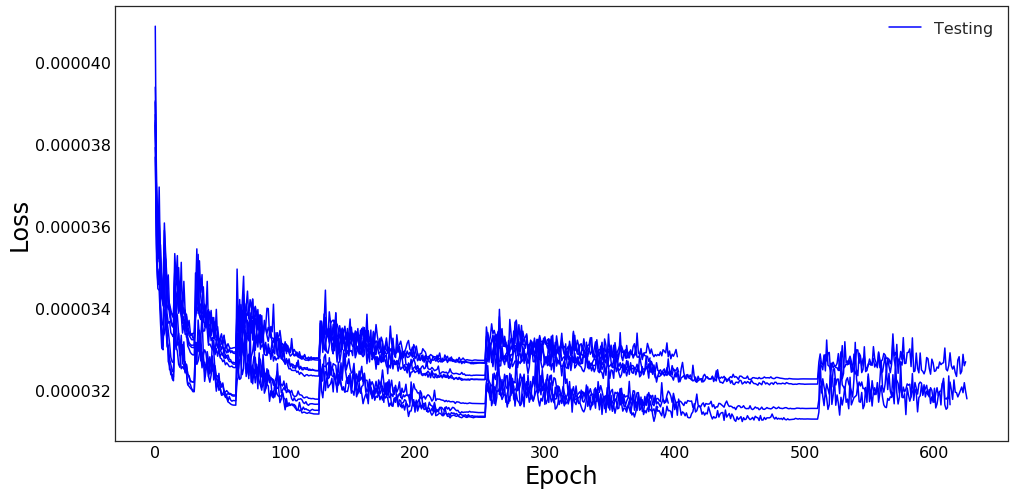

Mean wAUC = 0.0643 +- 0.0007
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=160, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 3 with loss = 3.1225373984748186e-05
Model 1 is 7 with loss = 3.131555208086347e-05
Model 2 is 4 with loss = 3.143648724087351e-05
Model 3 is 0 with loss = 3.1514201736796644e-05
Model 4 is 6 with loss = 3.211303172593295e-05
Model 5 is 2 with loss = 3.218473681938128e-05
Model 6 is 1 with loss = 3.234955005531553e-05
Model 7 is 5 with loss = 3.257954312791662e-05
Model 8 is 8 with loss = 3.2666623503300987e-05
Model 9 is 9 with loss = 3.268021482637235e-05


## Response on development data

In [9]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000834711312854s per sample

Predicting batch 2 out of 10
Prediction took 0.000253009400388s per sample

Predicting batch 3 out of 10
Prediction took 0.000258189786357s per sample

Predicting batch 4 out of 10
Prediction took 0.000257064306736s per sample

Predicting batch 5 out of 10
Prediction took 0.000265448594093s per sample

Predicting batch 6 out of 10
Prediction took 0.000262612557411s per sample

Predicting batch 7 out of 10
Prediction took 0.000291204357147s per sample

Predicting batch 8 out of 10
Prediction took 0.000314683638559s per sample

Predicting batch 9 out of 10
Prediction took 0.00027916706695s per sample

Predicting batch 10 out of 10
Prediction took 0.000253988245772s per sample



In [10]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.902806723946, weighted 0.939497502176


## Response on val data

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000293590593338s per sample

Predicting batch 2 out of 10
Prediction took 0.000460352611542s per sample

Predicting batch 3 out of 10
Prediction took 0.000424961996078s per sample

Predicting batch 4 out of 10
Prediction took 0.000476375007629s per sample

Predicting batch 5 out of 10
Prediction took 0.000951242208481s per sample

Predicting batch 6 out of 10
Prediction took 0.00042520699501s per sample

Predicting batch 7 out of 10
Prediction took 0.000373013401031s per sample

Predicting batch 8 out of 10
Prediction took 0.000336544799805s per sample

Predicting batch 9 out of 10
Prediction took 0.000533819198608s per sample

Predicting batch 10 out of 10
Prediction took 0.000662919378281s per sample



In [12]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.900433413487, weighted 0.934472633698


## Evaluation

### Import in dataframe

In [13]:
valframe = convertToDF(valData)

50000 candidates loaded


In [14]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

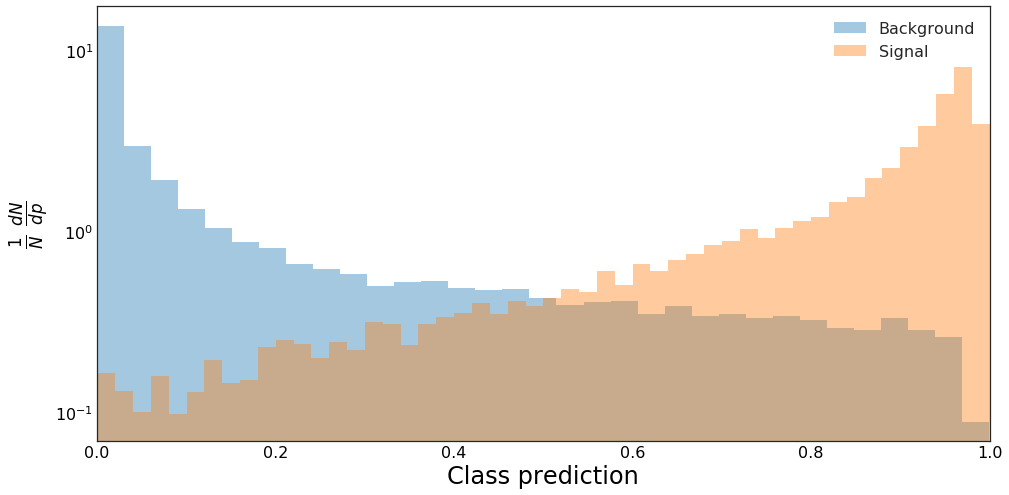

In [15]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [16]:
valframe['ams'] = amsScan(valframe)[0]

[0.9415283203125, 1.6834141210415647]


In [23]:
bests = foldAMSScan(valframe, 10)

[0.9617080092430115, 1.5742591632817116]
Fold 0, best AMS 1.57425916328 at cut of 0.961708009243. Total weights Signal:Bkg. 14.2145633698:8170.52294922


/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[0.9236617088317871, 1.6712413826333432]
Fold 1, best AMS 1.67124138263 at cut of 0.923661708832. Total weights Signal:Bkg. 13.6138534546:8131.48339844
[0.9391859173774719, 1.63217161964903]
Fold 2, best AMS 1.63217161965 at cut of 0.939185917377. Total weights Signal:Bkg. 13.3386974335:8080.81835938
[0.9590791463851929, 1.9404390149880906]
Fold 3, best AMS 1.94043901499 at cut of 0.959079146385. Total weights Signal:Bkg. 13.9301862717:8204.74707031
[0.9098246097564697, 1.822447866621124]
Fold 4, best AMS 1.82244786662 at cut of 0.909824609756. Total weights Signal:Bkg. 14.0525608063:8123.12695312
[0.9812681078910828, 1.9288310016157812]
Fold 5, best AMS 1.92883100162 at cut of 0.981268107891. Total weights Signal:Bkg. 14.8954191208:8183.21923828
[0.9441972374916077, 1.8750151518381657]
Fold 6, best AMS 1.87501515184 at cut of 0.944197237492. Total weights Signal:Bkg. 14.2033052444:8240.49316406
[0.9673137068748474, 2.0971665120365337]
Fold 7, best AMS 2.09716651204 at cut of 0.9673137

In [18]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000313323051279s per sample

Predicting batch 2 out of 10
Prediction took 0.000341830327294s per sample

Predicting batch 3 out of 10
Prediction took 0.000329180674119s per sample

Predicting batch 4 out of 10
Prediction took 0.000356906782497s per sample

Predicting batch 5 out of 10
Prediction took 0.000340157833966s per sample

Predicting batch 6 out of 10
Prediction took 0.000402657435157s per sample

Predicting batch 7 out of 10
Prediction took 0.000318224672838s per sample

Predicting batch 8 out of 10
Prediction took 0.000342022579367s per sample

Predicting batch 9 out of 10
Prediction took 0.000314272763512s per sample

Predicting batch 10 out of 10
Prediction took 0.000392057761279s per sample



In [19]:
saveTest(0.9568518293968669, 'Day_6')

../Data/Day_6_test.csv


In [21]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6 DO50"

Successfully submitted to Higgs Boson Machine Learning Challenge